# Evaluation Metrics for Classification

## Evaluation metrics: session overview 

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn


*Metric* - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"
!wget $data -O data-week-3.csv

--2025-03-19 10:19:39--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.04s   

2025-03-19 10:19:39 (22.4 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [6]:
df = pd.read_csv('data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [9]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [19]:
from sklearn.preprocessing import StandardScaler

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression(max_iter=500)

# Entrena el modelo
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500)

In [34]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)  # Calcula la probabilidad de churn (abandono) para cada cliente.

churn_decision = (y_pred >= 0.5)
print(churn_decision)
(y_val == churn_decision).mean()

[ True False False ...  True  True  True]


np.float64(0.2831795599716111)

Accuracy and dummy model

* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines

In [35]:
len(y_val) 
print(y_val.shape)
print(y_pred.shape)

(1409,)
(1409,)


In [36]:
(y_val == churn_decision).mean()

np.float64(0.2831795599716111)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
#Calcula la exactitud (accuracy) del modelo comparando las etiquetas reales (y_val) con las predicciones (y_pred) redondeadas a 0 o 1 (usando 0.5 como umbral).
accuracy_score(y_val, (y_pred >= 0.5)) 

0.2831795599716111

In [39]:
# Genera 21 puntos equidistantes entre 0 y 1 para usar como umbrales de clasificación

thresholds = np.linspace(0, 1, 21)

scores = []

# Itera sobre cada umbral para calcular la exactitud del modelo
for t in thresholds:
    # Calcula la exactitud comparando las etiquetas reales (y_val) con las predicciones (y_pred) redondeadas según el umbral actual
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.283
0.10 0.283
0.15 0.283
0.20 0.283
0.25 0.283
0.30 0.283
0.35 0.283
0.40 0.283
0.45 0.283
0.50 0.283
0.55 0.283
0.60 0.283
0.65 0.283
0.70 0.283
0.75 0.283
0.80 0.283
0.85 0.283
0.90 0.283
0.95 0.283
1.00 0.283


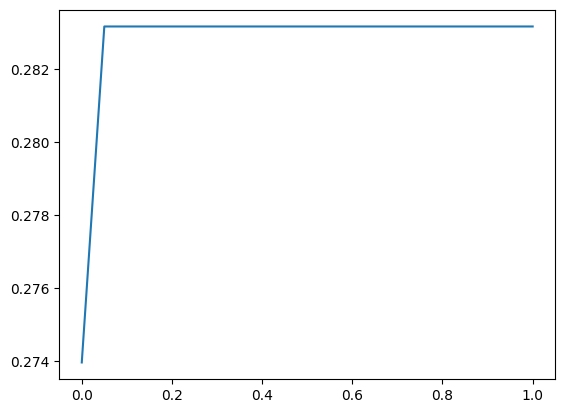

In [40]:
plt.plot(thresholds, scores)

## Confusion table

* Different types of errors and correct decisions
* Arranging them in a table

In [41]:
# Identifica las muestras que son realmente positivas (clase 1)
actual_positive = (y_val == 1)

# Identifica las muestras que son realmente negativas (clase 0)
actual_negative = (y_val == 0)


In [42]:

# Define el umbral de clasificación (threshold) en 0.5
t = 0.5

# Predice qué muestras son positivas según el umbral 
predict_positive = (y_pred >= 1)

# Predice qué muestras son negativas según el umbral 
predict_negative = (y_pred < 0)


In [43]:

# Calcula los verdaderos positivos (muestras predichas como positivas que realmente lo son)
tp = (predict_positive & actual_positive).sum()

# Calcula los verdaderos negativos (muestras predichas como negativas que realmente lo son)
tn = (predict_negative & actual_negative).sum()

# Calcula los falsos positivos (muestras predichas como positivas pero que realmente son negativas)
fp = (predict_positive & actual_negative).sum()

# Calcula los falsos negativos (muestras predichas como negativas pero que realmente son positivas)
fn = (predict_negative & actual_positive).sum()

In [44]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[   0, 1002],
       [   0,  378]])

In [55]:
confusion_matrix_percent = (confusion_matrix / confusion_matrix.sum()).round(2)
print(confusion_matrix_percent)

[[0.   0.73]
 [0.   0.27]]


/tmp/ipykernel_2880/1092569468.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', 'Predicción Negativa', 'Predicción Positiva'])
/tmp/ipykernel_2880/1092569468.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['', 'Real Negativo', 'Real Positivo'])


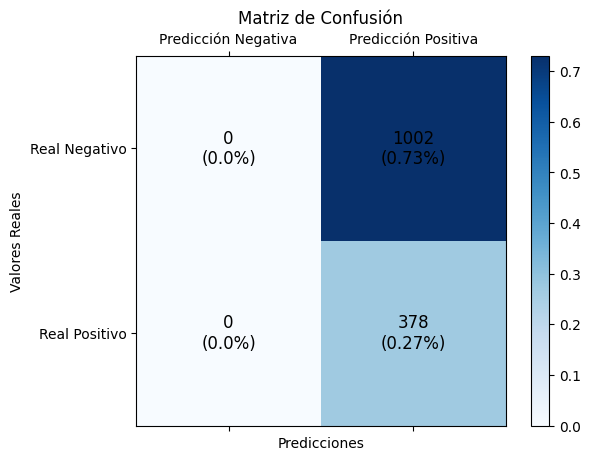

In [59]:
import matplotlib.pyplot as plt


# Crear el gráfico
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix_percent, cmap="Blues")  # Visualizar en color azul
plt.colorbar(cax)  # Barra de color

# Etiquetas de los ejes
ax.set_xticklabels(['', 'Predicción Negativa', 'Predicción Positiva'])
ax.set_yticklabels(['', 'Real Negativo', 'Real Positivo'])

# Mostrar valores dentro de la matriz
for i in range(2):
    for j in range(2):
        value = f"{confusion_matrix[i, j]}\n({confusion_matrix_percent[i, j]}%)"
        plt.text(j, i, value, ha='center', va='center', color="black", fontsize=12)

# Agregar títulos
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")

# Mostrar gráfico
plt.show()

## Precision and Recall

In [ ]:
# Calcula la precisión (precision): proporción de predicciones positivas correctas sobre el total de predicciones positivas
p = tp / (tp + fp)

# Muestra el valor de la precisión (precision)
p


np.float64(0.27391304347826084)

In [ ]:
# Calcula el recall (sensibilidad): proporción de verdaderos positivos sobre el total de positivos reales
r = tp / (tp + fn)

# Muestra el valor del recall (sensibilidad)
r


np.float64(1.0)

## 4.5 ROC Curves

### TPR and FRP

In [62]:

# Calcula la tasa de verdaderos positivos (TPR, True Positive Rate), que es igual al recall
tpr = tp / (tp + fn)

# Muestra el valor de la tasa de verdaderos positivos (TPR)
tpr


np.float64(1.0)

In [64]:

# Calcula la tasa de falsos positivos (FPR, False Positive Rate): proporción de falsos positivos sobre el total de negativos reales
fpr = fp / (fp + tn)

# Muestra el valor de la tasa de falsos positivos (FPR)
fpr


np.float64(1.0)

In [65]:
# Lista para almacenar los resultados de cada umbral
scores = []

# Genera 101 umbrales equidistantes entre 0 y 1
thresholds = np.linspace(0, 1, 101)

# Itera sobre cada umbral para calcular métricas de clasificación
for t in thresholds:
    # Identifica las muestras realmente positivas (clase 1)
    actual_positive = (y_val == 1)
    
    # Identifica las muestras realmente negativas (clase 0)
    actual_negative = (y_val == 0)
    
    # Predice qué muestras son positivas según el umbral actual 
    predict_positive = (y_pred >= 0.5 )
    
    # Predice qué muestras son negativas según el umbral actual 
    predict_negative = (y_pred < 0.5)

    # Calcula los verdaderos positivos (muestras predichas como positivas que realmente lo son)
    tp = (predict_positive & actual_positive).sum()
    
    # Calcula los verdaderos negativos (muestras predichas como negativas que realmente lo son)
    tn = (predict_negative & actual_negative).sum()

    # Calcula los falsos positivos (muestras predichas como positivas pero que realmente son negativas)
    fp = (predict_positive & actual_negative).sum()
    
    # Calcula los falsos negativos (muestras predichas como negativas pero que realmente son positivas)
    fn = (predict_negative & actual_positive).sum()
    
    # Almacena el umbral y las métricas calculadas en la lista de scores
    scores.append((t, tp, fp, fn, tn))


In [67]:
# Define las columnas para el DataFrame que almacenará los resultados
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

# Crea un DataFrame con los resultados
df_scores = pd.DataFrame(scores, columns=columns)

# Calcula la Tasa de Verdaderos Positivos (TPR) o Recall
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)

# Calcula la Tasa de Falsos Positivos (FPR)
df_scores['fpr'] = df_scores.fn / (df_scores.fn + df_scores.tn)


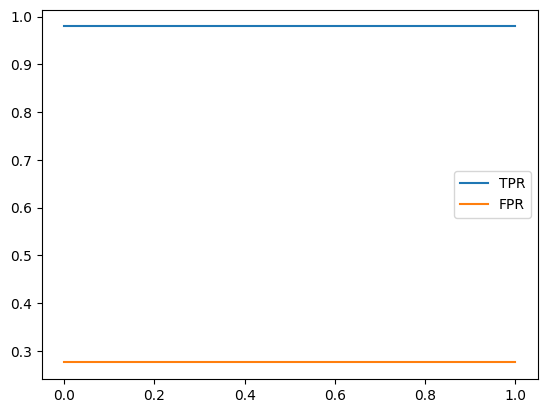

In [69]:
# Grafica la TPR y FPR en función del umbral
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')

# Muestra la leyenda en la gráfica
plt.legend()
plt.show()

## ROC AUC

* Area under the ROC curve - useful metric
* Interpretation of AUC

In [70]:
from sklearn.metrics import roc_curve

In [71]:
# Calcula la Tasa de Falsos Positivos (FPR), la Tasa de Verdaderos Positivos (TPR) y los umbrales
fpr, tpr, thresholds = roc_curve(y_val, y_pred)


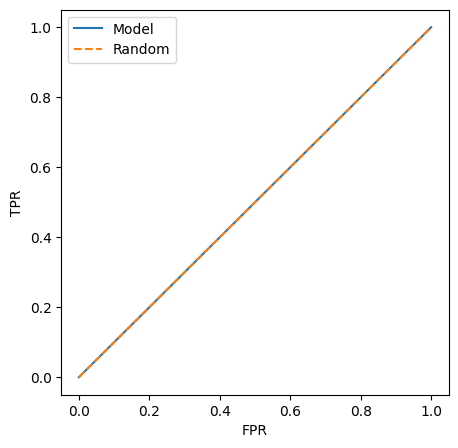

In [73]:
# Crea una figura de 5x5 pulgadas para la gráfica
plt.figure(figsize=(5, 5))

# Grafica la curva ROC del modelo (FPR vs TPR)
plt.plot(fpr, tpr, label='Model')

# Grafica la línea de referencia para un modelo aleatorio (diagonal)
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

# Etiqueta el eje X como "Tasa de Falsos Positivos" (FPR)
plt.xlabel('FPR')

# Etiqueta el eje Y como "Tasa de Verdaderos Positivos" (TPR)
plt.ylabel('TPR')

# Muestra la leyenda para diferenciar las curvas
plt.legend()
plt.show()

In [77]:
# Importa la función 'auc' de sklearn para calcular el área bajo la curva (AUC)
from sklearn.metrics import auc

# Calcula las tasas de falsos positivos (fpr), verdaderos positivos (tpr) y los umbrales usando la función 'roc_curve'
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

# Calcula el AUC usando las tasas de falsos positivos (fpr) y verdaderos positivos (tpr)
auc_v = auc(fpr, tpr)

# Importa la función 'roc_auc_score' para calcular el AUC directamente
from sklearn.metrics import roc_auc_score

# Calcula el AUC directamente comparando las etiquetas reales (y_val) con las predicciones (y_pred)
rocauc_v = roc_auc_score(y_val, y_pred)

# Separa las predicciones en dos grupos: las que corresponden a etiquetas negativas (0) y positivas (1)
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

print(auc_v)
print(rocauc_v)

0.4999012353182502
0.4999012353182502


## Cross-Validation

* Evaluating the same model on different subsets of data
* Getting the average prediction and the spread within predictions

In [83]:
# Define una función para entrenar un modelo de regresión logística
def train(df_train, y_train, C=1.0):
    # Convierte el DataFrame en una lista de diccionarios para el vectorizador
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    # Crea un vectorizador para convertir datos categóricos en numéricos
    dv = DictVectorizer(sparse=False)
    # Aplica el vectorizador a los datos de entrenamiento
    X_train = dv.fit_transform(dicts)

    # Inicializa el modelo de regresión logística con un parámetro de regularización C
    model = LogisticRegression(C=C, max_iter=1000)
    # Entrena el modelo con los datos de entrenamiento (X_train) y las etiquetas (y_train)
    model.fit(X_train, y_train)
    
    # Devuelve el vectorizador y el modelo entrenado
    return dv, model

# Entrena el modelo con un valor específico de C (parámetro de regularización)
print(df_train)
print(y_train)
dv, model = train(df_train, y_train, C=0.001)


      customerid  gender  seniorcitizen partner dependents  tenure  \
0     8015-ihcgw  female              0     yes        yes      72   
1     1960-uycnn    male              0      no         no      10   
2     9250-wypll  female              0      no         no       5   
3     6786-obwqr  female              0     yes        yes       5   
4     1328-euzhc  female              0     yes         no      18   
...          ...     ...            ...     ...        ...     ...   
4220  1309-xgfsn    male              1     yes        yes      52   
4221  4819-hjpiw    male              0      no         no      18   
4222  3703-vavcl    male              0     yes        yes       2   
4223  3812-lrzir  female              0     yes        yes      27   
4224  1704-nrwye  female              1      no         no       9   

     phoneservice     multiplelines internetservice       onlinesecurity  \
0             yes               yes     fiber_optic                  yes   
1      

In [87]:

# Define una función para hacer predicciones con el modelo entrenado
def predict(df, dv, model):
    # Convierte el DataFrame en una lista de diccionarios para el vectorizador
    dicts = df[categorical + numerical].to_dict(orient='records')

    # Aplica el vectorizador a los datos de validación/prueba
    X = dv.transform(dicts)
    
    # Predice las probabilidades de pertenecer a la clase positiva (columna 1)
    y_pred = model.predict(X)

    # Devuelve las predicciones
    return y_pred

# Realiza predicciones en el conjunto de validación
y_pred = predict(df_val, dv, model)

## Summary

* Metric - a single number that describes the performance of a model
* Accuracy - fraction of correct answers; sometimes misleading 
* Precision and recall are less misleading when we have class inbalance
* ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
* K-Fold CV - more reliable estimate for performance (mean + std)

# Análisis y Clasificación de Cáncer de Mama usando Random Forest: Evaluación de Métricas y Visualización de Datos

# Step #1 Load the Data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


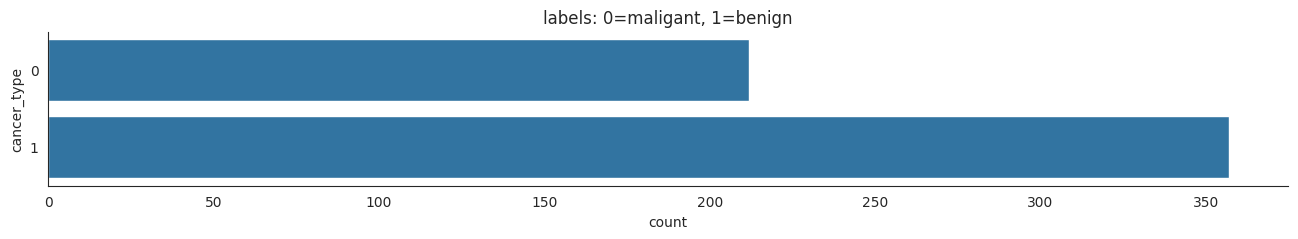

In [88]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import cross_val_predict
from sklearn import datasets
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

df = datasets.load_breast_cancer(as_frame=True)

df_dia = df.data
df_dia['cancer_type'] = df.target

plt.figure(figsize=(16,2))
plt.title(f'labels: 0=maligant, 1=benign')
fig = sns.countplot(y="cancer_type", data=df_dia)

df_dia.head()

# Step #2 Data Preparation and Model Training

In [112]:
# Separa las características (X) y las etiquetas (y) del conjunto de datos
print(df_dia.shape)

X = df_dia.drop('cancer_type', axis=1)  # Datos de entrenamiento (features)
# print(X.head())
y = df_dia['cancer_type']  # Etiquetas de predicción (target)
# print(y.head())


# Divide los datos en conjuntos de entrenamiento y prueba (50% para entrenamiento)
X_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)
print(X_train.shape)
print(y_train.shape)


(569, 31)
(284, 30)
(284,)


In [115]:
# Crea un clasificador de Random Forest con parámetros específicos
dfrst = RandomForestClassifier(n_estimators=3, max_depth=4, min_samples_split=6, class_weight='balanced')

# Entrena el modelo de Random Forest con los datos de entrenamiento
ranfor = dfrst.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = ranfor.predict(x_test)


# Step #3 Confusion Matrix and Metrics

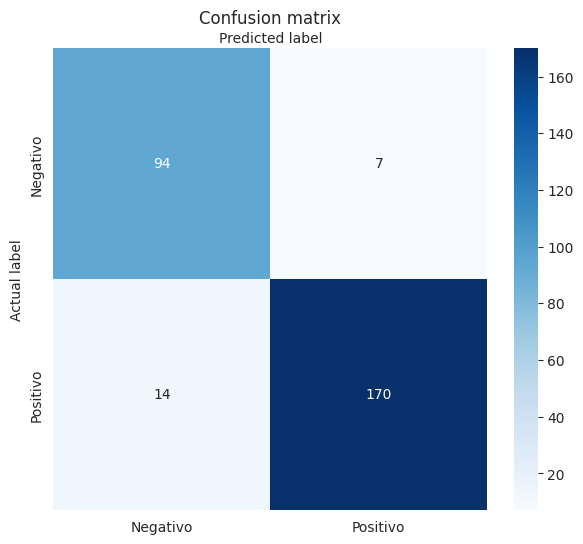

In [126]:
# Función para crear una matriz de confusión visual (heatmap)
def createConfMatrix(class_names, matrix):
    # class_names = [0, 1]  # Define las clases (0 y 1)
    tick_marks = [0.5, 1.5]  # Posiciones de las marcas en el heatmap
    fig, ax = plt.subplots(figsize=(7, 6))  # Crea la figura
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="Blues", fmt='g')  # Dibuja el heatmap
    ax.xaxis.set_label_position("top")  # Posición de la etiqueta del eje X
    plt.title('Confusion matrix')  # Título del gráfico
    plt.ylabel('Actual label')  # Etiqueta del eje Y (etiquetas reales)
    plt.xlabel('Predicted label')  # Etiqueta del eje X (etiquetas predichas)
    plt.yticks(tick_marks, class_names)  # Ajusta las marcas del eje Y
    plt.xticks(tick_marks, class_names)  # Ajusta las marcas del eje X

# Calcula la matriz de confusión usando las etiquetas reales y predichas
cnf_matrix = confusion_matrix(y_test, y_pred)

# Llama a la función para crear y mostrar la matriz de confusión
createConfMatrix(matrix=cnf_matrix, class_names=['Negativo', 'Positivo'])


In [132]:
from sklearn.metrics import det_curve

# Calcula e imprime métricas de evaluación del modelo
print('accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))  # Exactitud
print('precision: {:.2f}'.format(precision_score(y_test, y_pred)))  # Precisión
print('recall: {:.2f}'.format(recall_score(y_test, y_pred)))  # Sensibilidad (recall)
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred)))  # Puntaje F1
fpr, fnr, thresholds = det_curve(y_test, y_pred)
print('False positive rate: {:.2f}'.format(fpr[1]))
print('False positive rate: {:.2f}'.format(fnr[1]))


# Genera un reporte de clasificación con métricas adicionales
results_log = classification_report(y_test, y_pred, output_dict=True)  # Reporte en formato diccionario
results_df_log = pd.DataFrame(results_log).transpose()  # Convierte el reporte a un DataFrame
print(results_df_log)  # Imprime el reporte

accuracy: 0.93
precision: 0.96
recall: 0.92
f1_score: 0.94
False positive rate: 0.07
False positive rate: 0.08
              precision    recall  f1-score     support
0              0.870370  0.930693  0.899522  101.000000
1              0.960452  0.923913  0.941828  184.000000
accuracy       0.926316  0.926316  0.926316    0.926316
macro avg      0.915411  0.927303  0.920675  285.000000
weighted avg   0.928528  0.926316  0.926835  285.000000


# Step #4 ROC Curve

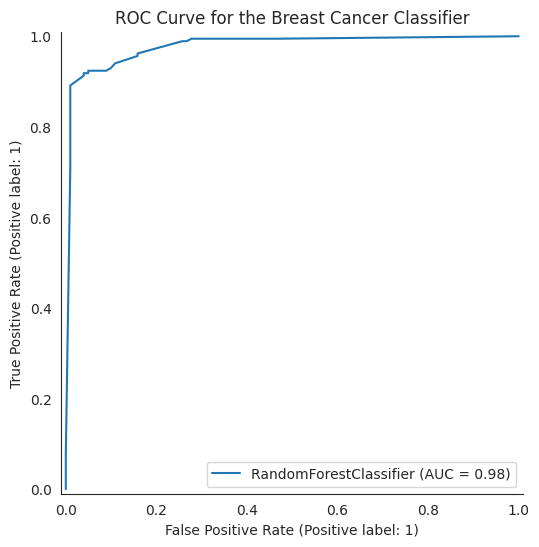

In [133]:
# Compute ROC curve
fig, ax = plt.subplots(figsize=(10, 6))
RocCurveDisplay.from_estimator(ranfor, x_test, y_test, ax=ax)
plt.title('ROC Curve for the Breast Cancer Classifier')
plt.show()

In [136]:
# Calculate probability scores 
y_scores = cross_val_predict(ranfor, x_test, y_test, cv=3, method='predict_proba')
# Because of the structure of how the model returns the y_scores, we need to convert them into binary values
y_scores_binary = [1 if x[0] < 0.5 else 0 for x in y_scores]

# Now, we can calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_scores_binary, average="macro")
auc # Be aware that due to the random nature of cross validation, the results will change when you run the code

np.float64(0.943123116659492)

# Evaluating a classification model 

## Agenda

- What is the purpose of **model evaluation**, and what are some common evaluation procedures?
- What is the usage of **classification accuracy**, and what are its limitations?
- How does a **confusion matrix** describe the performance of a classifier?
- What **metrics** can be computed from a confusion matrix?
- How can you adjust classifier performance by **changing the classification threshold**?
- What is the purpose of an **ROC curve**?
- How does **Area Under the Curve (AUC)** differ from classification accuracy?

## Review of model evaluation

- Need a way to choose between models: different model types, tuning parameters, and features
- Use a **model evaluation procedure** to estimate how well a model will generalize to out-of-sample data
- Requires a **model evaluation metric** to quantify the model performance

### Model evaluation procedures

1. **Training and testing on the same data**
    - Rewards overly complex models that "overfit" the training data and won't necessarily generalize
2. **Train/test split**
    - Split the dataset into two pieces, so that the model can be trained and tested on different data
    - Better estimate of out-of-sample performance, but still a "high variance" estimate
    - Useful due to its speed, simplicity, and flexibility
3. **K-fold cross-validation**
    - Systematically create "K" train/test splits and average the results together
    - Even better estimate of out-of-sample performance
    - Runs "K" times slower than train/test split

### Model evaluation metrics

- **Regression problems:** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Classification problems:** Classification accuracy

## Classification accuracy

[Pima Indians Diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) originally from the UCI Machine Learning Repository

In [153]:
# read the data into a pandas DataFrame
import pandas as pd
path = 'pima-indians-diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(path, header=0, names=col_names)

In [154]:
# print the first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Question:** Can we predict the diabetes status of a patient given their health measurements?

In [155]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [159]:

# Importa la función para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Divide los datos en conjuntos de entrenamiento (70%) y prueba (30%), con una semilla aleatoria fija
X_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=0)
print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(537, 4)
(231, 4)
(537,)
(231,)


In [161]:
# Importa el modelo de regresión logística de scikit-learn
from sklearn.linear_model import LogisticRegression

# Crea una instancia del modelo de regresión logística, especificando el solver 'liblinear'
logreg = LogisticRegression(solver='liblinear')

# Entrena el modelo de regresión logística usando los datos de entrenamiento (X_train, y_train)
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [162]:
# Realiza predicciones de clase para el conjunto de prueba usando el modelo de regresión logística
y_pred_class = logreg.predict(x_test)

**Classification accuracy:** percentage of correct predictions

In [163]:
# Calcula la exactitud (accuracy) del modelo comparando las etiquetas reales (y_test) con las predichas (y_pred_class)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.696969696969697


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [167]:
# Examina la distribución de clases en el conjunto de prueba (cuántas muestras hay de cada clase)
print(f'Distribucion de clases:\n {y_test.value_counts()}\n')

# Calcula el porcentaje de muestras de la clase "1" en el conjunto de prueba
print(f'% de muestras clase 1:\n {y_test.mean()}\n')

# Calcula el porcentaje de muestras de la clase "0" en el conjunto de prueba
print(f'% de muestras clase 0:\n {1 - y_test.mean()}\n')

# Calcula la "exactitud nula" (null accuracy) para problemas de clasificación binaria (0/1)
print(f'Null accuracy (clasificacion binaria):\n {max(y_test.mean(), 1 - y_test.mean())}\n')

# Calcula la "exactitud nula" para problemas de clasificación multiclase (clase más frecuente)
print(f'Null accuracy (clasificacion multiclase):\n {y_test.value_counts().head(1) / len(y_test)}\n')




Distribucion de clases:
 label
0    157
1     74
Name: count, dtype: int64

% de muestras clase 1:
 0.3203463203463203

% de muestras clase 0:
 0.6796536796536796

Null accuracy (clasificacion binaria):
 0.6796536796536796

Null accuracy (clasificacion multiclase):
 label
0    0.679654
Name: count, dtype: float64



Comparing the **true** and **predicted** response values

In [168]:
# Imprime las primeras 25 etiquetas reales y las predichas para compararlas visualmente
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Conclusion:**

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making

## Confusion matrix

Table that describes the performance of a classification model

In [169]:
# IMPORTANTE: El primer argumento son los valores reales, el segundo son los valores predichos

# Calcula e imprime la matriz de confusión para evaluar el rendimiento del modelo
print(metrics.confusion_matrix(y_test, y_pred_class))

[[142  15]
 [ 55  19]]


**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes (a "Type II error")

In [170]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [171]:
# Calcula la matriz de confusión y divide sus componentes (TP, TN, FP, FN)
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]  # Verdaderos positivos
TN = confusion[0, 0]  # Verdaderos negativos
FP = confusion[0, 1]  # Falsos positivos
FN = confusion[1, 0]  # Falsos negativos


![Large confusion matrix](images/09_confusion_matrix_2.png)

## Metrics computed from a confusion matrix

### Classification Accuracy
**Classification Accuracy:** Overall, how often is the classifier correct?

In [172]:

# Calcula e imprime la exactitud (accuracy) manualmente
print((TP + TN) / (TP + TN + FP + FN))

# Calcula e imprime la exactitud usando la función de sklearn
print(metrics.accuracy_score(y_test, y_pred_class))


0.696969696969697
0.696969696969697


### Recall / True positive rate / Sensitivity
**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [173]:

# Calcula e imprime el recall (sensibilidad o tasa de verdaderos positivos)
print(TP / (TP + FN))

# Calcula e imprime el recall usando la función de sklearn
print(metrics.recall_score(y_test, y_pred_class))


0.25675675675675674
0.25675675675675674


### True negative rate / Specificity
**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [174]:

# Calcula e imprime la especificidad (tasa de verdaderos negativos)
print(TN / (TN + FP))


0.9044585987261147


### False Positive Rate
**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [175]:
# Calcula e imprime la tasa de falsos positivos (false positive rate)
print(FP / (FP + TN))


0.09554140127388536


### Precision
**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [ ]:
# Calcula e imprime la precisión (precision)
print(TP / (TP + FP))

# Calcula e imprime la precisión usando la función de sklearn
print(metrics.precision_score(y_test, y_pred_class))

0.5588235294117647
0.5588235294117647


Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.

**Conclusion:**

- Confusion matrix gives you a **more complete picture** of how your classifier is performing
- Also allows you to compute various **classification metrics**, and these metrics can guide your model selection

**Which metrics should you focus on?**

- Choice of metric depends on your **business objective**
- **Spam filter** (positive class is "spam"): Optimize for **precision or specificity** because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- **Fraudulent transaction detector** (positive class is "fraud"): Optimize for **sensitivity** because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

## Adjusting the classification threshold

[0 0 0 0 0 0 0 1 0 1]
[[0.6285962  0.3714038 ]
 [0.71850871 0.28149129]
 [0.70739716 0.29260284]
 [0.58354386 0.41645614]
 [0.83934089 0.16065911]
 [0.82974079 0.17025921]
 [0.50156009 0.49843991]
 [0.48193727 0.51806273]
 [0.73327319 0.26672681]
 [0.32304278 0.67695722]]
[0.3714038  0.28149129 0.29260284 0.41645614 0.16065911 0.17025921
 0.49843991 0.51806273 0.26672681 0.67695722]


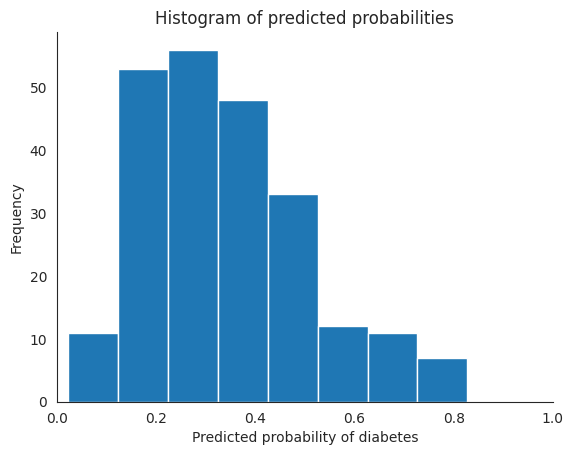

In [178]:
# Imprime las primeras 10 respuestas predichas por el modelo
print(logreg.predict(x_test)[0:10])

# Imprime las primeras 10 probabilidades predichas de pertenencia a cada clase
print(logreg.predict_proba(x_test)[0:10, :])

# Imprime las primeras 10 probabilidades predichas para la clase 1 (positiva)
print(logreg.predict_proba(x_test)[0:10, 1])

# Almacena las probabilidades predichas para la clase 1 (positiva)
y_pred_prob = logreg.predict_proba(x_test)[:, 1]

# Permite que los gráficos aparezcan en el notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Crea un histograma de las probabilidades predichas
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**

- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity
- Sensitivity and specificity have an **inverse relationship**

## ROC Curves and Area Under the Curve (AUC)

**Question:** Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

**Answer:** Plot the ROC curve!

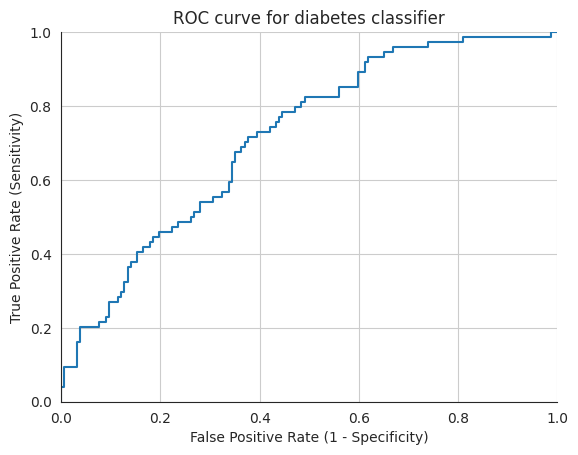

In [184]:
# Importante: el primer argumento son los valores reales, el segundo son las probabilidades predichas
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
# Grafica la curva ROC (False Positive Rate vs True Positive Rate)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
# plt.plot(thresholds)
plt.grid(True)

- ROC curve can help you to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually **see the thresholds** used to generate the curve on the ROC curve itself

In [188]:
# Define una función que acepta un umbral e imprime la sensibilidad y especificidad correspondientes
def evaluate_threshold(threshold):
    print(thresholds)
    print('Sensitivity:', tpr[thresholds > threshold][-1])  # Imprime la sensibilidad para el umbral dado
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])  # Imprime la especificidad para el umbral dado

# Evalúa el rendimiento del modelo con un umbral de 0.5
evaluate_threshold(threshold=0.5)

# Evalúa el rendimiento del modelo con un umbral de 0.3
evaluate_threshold(threshold=0.3)

[       inf 0.82736088 0.79661005 0.77995767 0.70928086 0.67695722
 0.63625218 0.63368633 0.59957883 0.55391993 0.54549854 0.52778891
 0.52261001 0.51853786 0.49843991 0.48951349 0.48248377 0.47832879
 0.47741398 0.47497421 0.47057918 0.46999044 0.45980557 0.45843221
 0.45677699 0.45540035 0.44582884 0.43972866 0.43885334 0.43621301
 0.43547199 0.43544958 0.42946836 0.42455527 0.4244594  0.41746385
 0.41645614 0.41407148 0.4118816  0.39945818 0.39749761 0.39242505
 0.38907858 0.38060308 0.37932685 0.37593096 0.37371476 0.37140511
 0.3714038  0.36545172 0.35513204 0.35201139 0.34751609 0.34634925
 0.3425906  0.34056074 0.33469577 0.33381188 0.32863125 0.32482202
 0.3133795  0.30558852 0.30529431 0.30157327 0.29981975 0.29565825
 0.29479472 0.29260284 0.2923176  0.29110503 0.29092415 0.28033928
 0.27961827 0.27646514 0.27617249 0.2760054  0.27233748 0.25495704
 0.25078786 0.23849007 0.23444271 0.23010106 0.22821525 0.2274853
 0.22578275 0.21540812 0.21478602 0.20996831 0.20871652 0.19136

AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [189]:
# Importante: el primer argumento son los valores reales, el segundo son las probabilidades predichas

# Calcula e imprime el área bajo la curva ROC (AUC) con la funcion roc_auc_score
print(metrics.roc_auc_score(y_test, y_pred_prob))


0.7156137028748494


- AUC is useful as a **single number summary** of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

In [190]:
# Calcula el AUC validado cruzadamente (usando 10 particiones)
from sklearn.model_selection import cross_val_score

cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()  # Imprime el AUC promedio

np.float64(0.7378233618233618)

**Confusion matrix advantages:**

- Allows you to calculate a **variety of metrics**
- Useful for **multi-class problems** (more than two response classes)

**ROC/AUC advantages:**

- Does not require you to **set a classification threshold**
- Still useful when there is **high class imbalance**

# 09 - Clasificación de textos con Scikit-Learn

* En este notebook vamos a ver como clasificar una serie de Tweets en Ingles sobre críticas a los productos de Apple.


* Estos tweets estan clasificados como: *positivos*, *neutros* o *negativos*


* El este notebook realizaremos los siguientes pasos:
    
    1. Carga de los datos (tweets)
    2. Normalización (en ingles) de los tweets
    3. Creacción de la Bolsa de Palabras
    4. Particionado de Datos
    5. Creacción de modelos
        - Multinomial Naive Bayes
        - Bernoulli Naive Bayes
        - Regresion Logistica
        - Support Vector Machine
        - Random Forest <sup>(*)Meta-Modelo</sup>
    6. Evaluación de los modelos

<hr>


## Carga de Datos


* El primer paso que vamos a realizar es el de cargar los datos. Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe) y posteriormente lo transformaremos en una lista de tuplas (*tweets*) donde cada tupla esta formada por:
    - **Posición 0**: Tweet
    - **Posición 1**: Polaridad (Positivo | Neutro | Negativo)

In [245]:
import pandas as pd
tweets_file = 'Apple_Tweets.csv'
df = pd.read_csv(tweets_file, header=None)
tweets = [tuple(x) for x in df.values]
print('Número de Tweets Cargados: {num}'.format(num=len(tweets)))

Número de Tweets Cargados: 3804


<hr>


## Normalización

* Para este ejemplo haremos uso de ***spaCy***, pero en este caso tenemos que utilizar (e importar) el modelo para Inglés. Para ello: debemos de abrir un terminal en python y ejecutar lo siguiente para descargar el modelo en Ingles (*NOTA: los que uséis conda, tener activado el entorno*).


```
>> python3 -m spacy download en_core_web_sm
```


<img src="./imgs/010_spacy_en_download.png" style="width: 600px;"/>


* Para ***normalizar*** los tweets realizaremos las siguientes acciones:
    1. Pasamos las frases a minúsculas.
    2. Eliminamos los signos de puntuación.
    3. Eliminamos las palabras con menos de 3 caracteres.
    4. Eliminamos las Stop-Words.
    5. Eliminamos las palabras que empiecen por '@' o 'http'.
    6. Pasamos la palabra a su lema


* Todos estos pasos los vamos a realizar en una misma función.


* ***NOTA***: *De cara a la normalización de textos se pueden realizar más acciones que las que vamos a realizar, pero con estas serán más que suficientes para realizar un ejercicio con fines didácticos*
    

In [254]:
pip install spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.7/634.7 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.0/761.0 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 52.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [261]:
!python -m spacy download en_core_web_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 25.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [265]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.4 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [267]:
import spacy

from tqdm import tqdm

nlp = spacy.load('en_core_web_sm')

# Divido los datos en dos listas 
#     X: los tweets
#     y: target (polaridad)

X = [doc[0] for doc in tweets]
y = [doc[1] for doc in tweets]

def normalize(sentenses):
    """normalizamos la lista de frases y devolvemos la misma lista de frases normalizada"""
    for index, sentense in enumerate(tqdm(sentenses)):
        sentense = nlp(sentense.lower()) # Paso la frase a minúsculas y a un objeto de la clase Doc de Spacy
        sentenses[index] = " ".join([word.lemma_ for word in sentense if (not word.is_punct)
                                     and (len(word.text) > 2) and (not word.is_stop) 
                                     and (not word.text.startswith('@')) and (not word.text.startswith('http'))])
    return sentenses

# Normalizamos las frases
X = normalize(X)

100%|██████████████████████████████████████| 3804/3804 [00:20<00:00, 183.28it/s]


<hr>


## Bolsa de Palabras


* El siguiente paso es transformar los tweets a una bolsa de palabras de frecuencias para que sirva de entrada al modelo.


* Dado que ya estamos trabajando con un corpus relativamente grande, es necesario reducir el diccionario de palabras (no confundir con un diccionario Python) para trabajar solo con las palabras más relevantes.


* La implementación de la clase "*CountVectorizer*" de scikit, permite quedarnos con las palabras más relevante. Para ello podemos utilizar dos parámetros que son:
    - **max_features**: Con este parámetro le indicamos que nos seleccione la '*X*' palabras más frecuentes del corpus. En este ejemplo **seleccionaremos las 1000 más frecuentes**.
    - **min_df**: Con este parámetro le indicamos el número mínimo de documentos en la que tiene que aparecer la palabra para que se incluya en la bolsa de palabras. En este ejemplo **seleccionaremos 3 documentos** (tweets).
    

* ***NOTA***: para más información podéis mirar la documentación de la clase "*CountVectorizer*" en: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
    

In [269]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000, min_df=3)

# Pasamos los tweets normalizados a Bolsa de palabras
X = vectorizer.fit_transform(X)

<hr>


## Particionado de Datos (Train y Test)

* Vamos a particionar los datos en conjunto de Train y Test.


* Para este ejemplo nos vamos a quedar con:
    - 80% de datos de entrenamiento
    - 20% de datos de test

In [271]:
from sklearn.model_selection import train_test_split  

# Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%), con una semilla aleatoria fija (random_state=0)
____, ____, y_train, y_test = ______(X, y, test_size=0.2, random_state=0)

print('Número de Tweets para el entrenamiento: {num}'.format(num=X_train.shape[0]))
print('Número de Tweets para el test: {num}'.format(num=X_test.shape[0]))

Número de Tweets para el entrenamiento: 3043
Número de Tweets para el test: 761


<hr>


## Creacción del Modelo


* Una vez tenemos creada la bolsa de palabras, podemos usar cualquier algoritmo de aprendizaje para la clasificación.


* Para este ejemplo vamos a usar los siguientes algoritmos de aprendizaje:

    - Multinomial Naive Bayes: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
    - Bernoulli Naive Bayes: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
    - Regresion Logistica: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    - Support Vector Machine Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    - Random Forest (ensemble): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    

* Para esta caso vamos a crear el modelo y calcular el accuracy para los datos de entrenamiento y tener una idea de que modelo puede funciona mejor:

In [273]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
svm_lin = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')
svm_sig = SVC(kernel='sigmoid')
rf_20 = RandomForestClassifier(n_estimators=500, bootstrap=True, criterion='gini', max_depth=20, random_state=0)
rf_50 = RandomForestClassifier(n_estimators=500, bootstrap=True, criterion='gini', max_depth=50, random_state=0)

clasificadores = {'Multinomial NB': mnb,
                  'Bernoulli NB': bnb,
                  'Regresion Logistica': lr,
                  'SVM lineal': svm_lin,
                  'SVM polinomico': svm_poly,
                  'SVM Kernel rbf': svm_rbf,
                  'SVM Kernel Sigmoid': svm_sig,
                  'Random Forest d_20': rf_20,
                  'Random Forest d_50': rf_50}


# Ajustamos los modelos y calculamos el accuracy para los datos de entrenamiento
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X_train, y_train)

CREANDO MODELO: Multinomial NB
CREANDO MODELO: Bernoulli NB
CREANDO MODELO: Regresion Logistica
CREANDO MODELO: SVM lineal


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


CREANDO MODELO: SVM polinomico
CREANDO MODELO: SVM Kernel rbf
CREANDO MODELO: SVM Kernel Sigmoid
CREANDO MODELO: Random Forest d_20
CREANDO MODELO: Random Forest d_50


<hr>


## Evaluación del Modelo


* Para cada uno de los modelos vamos a calcular las siguientes métricas de evaluación:

    1. **Accuracy**
    2. **Precision**
    3. **Recall**
    4. **F1**

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

def evaluation(model, name, X_train, y_train, X_test, y_test):
    """
    Función de devuelve en un diccionario las métricas de evaluación de 
    Accuracy, Precision, Recall y F1 para los conjuntos de datos de entrenamiento y test
        model: modelo a evaluar
        name: nombre del modelo
        X_train: Variables de entrada del conjunto de datos de entrenamiento
        y_train: Variable de salida del conjunto de datos de entrenamiento
        X_test: Variables de entrada del conjunto de datos de test
        y_test: Variable de salida del conjunto de datos de test
        return: diccionario con el nombre del modelo y el valor de las métricas
    """
    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.____(_____)  # Predicciones en el conjunto de entrenamiento
    y_pred_test = model.____(____)   # Predicciones en el conjunto de prueba
    model_dict['accuracy_train'] = _____(y_true=y_train, y_pred=y_pred_train)  # Exactitud en entrenamiento
    model_dict['accuracy_tests'] = _____(y_true=y_test, y_pred=y_pred_test)    # Exactitud en prueba
    model_dict['precision_train'] = _____(y_true=y_train, y_pred=y_pred_train, average='weighted')  # Precisión en entrenamiento
    model_dict['precision_tests'] = _____(y_true=y_test, y_pred=y_pred_test, average='weighted')    # Precisión en prueba
    model_dict['recall_train'] = _____(y_true=y_train, y_pred=y_pred_train, average='weighted')        # Recall en entrenamiento
    model_dict['recall_tests'] = _____(y_true=y_test, y_pred=y_pred_test, average='weighted')          # Recall en prueba
    model_dict['f1_train'] = _____(y_true=y_train, y_pred=y_pred_train, average='weighted')                # F1-score en entrenamiento
    model_dict['f1_tests'] = _____(y_true=y_test, y_pred=y_pred_test, average='weighted')                  # F1-score en prueba
    
    return model_dict  # Devuelve un diccionario con las métricas calculadas



# Calcula las métricas de evaluación para cada modelo en el diccionario "clasificadores"
evaluacion = list()
for key, model in clasificadores.items():
    evaluacion.append(evaluation(model=model, name=key, 
                                 X_train=X_train, y_train=y_train,
                                 X_test=X_test, y_test=y_test))

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

* Representamos las métricas para los diferentes modelos en un gráfico de barras:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Métricas a pintar
METRICS = ["accuracy", "precision", "recall", "f1"]

# Transformamos el dataframe para pintar las gráficas con seaborn
df_plot = df.reset_index().melt(id_vars='name').rename(columns=str.title)

plt.figure(figsize=(25, 12))
pos = 1
for metric in METRICS:
    # Filtramos la métrica a pintar
    df_aux = df_plot[df_plot['Variable'].str.contains(metric)]
    
    # Pintamos la gráfica en su posición 2x2
    plt.subplot(2, 2, pos)
    sns.barplot(x='Name', y='Value', hue='Variable', data=df_aux)
    plt.title(metric.upper())
    plt.grid()
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=20)
    pos += 1
plt.show()

* Veamos las matrices de confusión de los modelos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from sklearn.metrics import confusion_matrix

# Obtenemos las Matrices de confusión
msc = list()
for k, v in clasificadores.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    model['confusion_matrix_train'] = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    msc.append(model)

    
# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Pintamos las matrices de confusión
plt.figure(figsize=(20, 45))
pos = 0
for mc in msc:
    pos += 1
    plt.subplot(9, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=['positive', 'neutral', 'negative'], 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    pos += 1
    plt.subplot(9, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=['positive', 'neutral', 'negative'], 
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()

<hr>


# Bonus Track I - Técnicas de Evaluación


* Para evaluar los modelos obtenidos tras la aplicación de alguna de las técnicas de ML, es necesario disponer de un ***conjunto de datos*** (etiquetados o no) para ***generar el mejor modelo  posible y minimizar el error empírico***.


* Dado un conjunto de datos, podemos enumerar los siguientes ***métodos de evaluación*** en función de cómo se dividen los datos de entrenamiento y de test:
<span></span><br><br>
    - **Resustitución**: Todos los datos disponibles se utilizan como datos de test y de entrenamiento.
<span></span><br><br>
    - **Partición (Hold Out)**: Divide los datos en dos subconjuntos: uno de entrenamiento y uno de test.
<span></span><br><br>
<img src="./imgs/021_tec_eval.png" style="width: 500px;"/>
<span></span><br><br>
    - **Validación cruzada (Cross Validation)**: Divide los datos aleatoriamente en ‘N’ bloques. Cada bloque se utiliza como test para un sistema entrenado por el resto de bloques.
<span></span><br><br>
<img src="./imgs/022_tec_eval.png" style="width: 500px;"/>
<span></span><br><br>
    - **Exclusión individual (Leave One Out)**: Este método utiliza cada dato individual como dato único de test de un sistema entrenado con todos los datos excepto el de test.
<span></span><br><br>
<img src="./imgs/023_tec_eval.png" style="width: 500px;"/>


<hr>


# Bonus Track II - Evaluacion de Modelos de Clasificación


* Para los problemas de Clasificación se utilizan (entre otros) las siguientes métricas de evaluación:

    - ***Accuracy***
    - ***Precision***
    - ***Recall***
    - ***Specificity***
    - ***F-score***
    - ***Curva ROC***
    -  ***ROC_AUC: Área sobre la curva ROC***


* Para ver como clasifica el modelo generado usamos la denominada ***“Matriz de Confusión”*** en la cual se muestra el número de elementos que clasifica como verdaderos y falsos positivos y verdaderos y falsos negativos.


* Veamos a continuación los detalles de las métricas de evaluación y la matriz de confusión:


<hr>


## - Matriz de confusión

* Cuando hablamos de clasificación tenemos que medir cuanto hemos acertado y como lo hemos acertado, por ello las ***matrices de confusión nos ayudan a ver el acierto o fallo que tiene nuestro modelo a la hora de clasificar***. La matriz de confusión tiene la siguiente forma:

    - **True Positive (TP)**: Valores positivos clasificados como positivos
    - **True Negative (TN)**: Valores negativos clasificados como negativos
    - **False Positive (FP)**: Valores negativos clasificados como positivos
    - **False Negative (FN)**: Valore positivos clasificados como negativos
    
<img src="./imgs/011_Matriz_Confusion.png" style="width: 400px;"/>


## - Accuracy

* Indica el porcentaje de acierto:

$$Acuracy = \frac{TP + TN}{TP + FN + FP + TN}$$

## - Precision

* Los positivos correctamente pronosticados entre todos los ejemplos pronosticados como positivos. 


* "***De lo que hemos pronosticado, cuanto hemos acertado***"


$$Precision = \frac{TP}{TP + FP}$$


<img src="./imgs/012_Matriz_Confusion_precision.png" style="width: 400px;"/>
                                                               
                                                               

## - Recall


* Los positivos correctamente pronosticados, entre todos los ejemplos que son positivos. 


* "***De lo que hay en realidad, cuanto hemos acertado***"


$$Recall = \frac{TP}{TP + FN}$$


<img src="./imgs/013_Matriz_Confusion_recall.png" style="width: 400px;"/>


## - Specificity


* Los negativos correctamente pronosticados, entre todos los ejemplos que son negativos. 


$$Specificity = \frac{TN}{TN + FP} = \frac{TN}{Negative}$$


<img src="./imgs/021_eval.png" style="width: 400px;"/>


## - F-Score (Precision-Recall)


* Es una media que ***combina la precisión y el recall con la media armonica de ambas medidas***. 


* Si es cercano a ***1*** significa que la clasificación realizada es buena. 


* Si es cercano a ***0*** la clasificación realizada es mala.


* Se utiliza la media armonica, porque esta penaliza el hecho de que uno de los dos valores(el Precision o el Recall) tenga un valor bajo.


* El ***F1*** o ***F-score*** (siendo $score=1$) se calcula de la siguiente manera:


$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$


* Esta medida en realidad debería de llamarse $F_\beta$ calculandose de la siguiente manera:

$$F_\beta =  \frac{(1+\beta^2) \cdot Precision \cdot Recall}{\beta^2 \cdot Precision + Recall}$$


* En función del valor que le demos a $F_\beta$ la media armónica dará más importancia a la Precision o al Recall; por ejemplo:

    + $F_{0}$: Es el Recall.
    + $F_{0.5}$: Da más peso a la Precision que al Recall.
    + $F_{1}$: Asigna el mismo peso a la Precision que al Recall.
    + $F_{2}$: Da más peso a la Recall que a la Precision.
    + $F_{\infty}$: Es la Precision.
    
    
* ***La medida del F-Score es conocida como la medida F1 porque de esta manera se calcula la media armónica entre la Precision y el Recall otorgando a ambas el mismo peso.***


## Curva ROC


* La ***curva ROC*** (***R***eceiver ***O***perating ***C***haracteristic) es una gráfica que ***representa la Tasa de Verdaderos Positivos (TPR) en el eje vertical frente a la Tasa de Falsos Positivos (FPR) en el eje horizontal***.

    <img src="./imgs/022_eval.png" style="width: 400px;"/>

* Siendo:
<br>

    + ***TPR***: Recall
        $$TPR = Recall = \frac{TP}{TP + FN} = \frac{TP}{Positive}$$
    + ***FPR***: Fall-out
        $$FPR = Fall-Out = \frac{FP}{FP + TN} = \frac{FP}{Negative}$$

* Para ***construir esta curva***:

    1. Nuestro ***modelo de clasificación nos tiene que devolver una probabilidad o score de pertenencia a la clase positiva y debemos de ordenar esa probabilidad o score de mayor a menor valor*** (de manera decreciente).
<br>

    2. ***Al recorrer los elementos ordenados*** vemos:
        + Si nos encontramos un elemento que ***pertenece a la clase positiva (TPR) nos movemos verticalmente hacia arriba***.
        + Si nos encontremos un elemento que ***pertenece a la clase negativa (FPR) nos movemos hacia la derecha***.
        
* Por otro lado, en la curva ROC conecta siempre los puntos (0,0) y (1,1) con una recta, normalmente representada de manera punteada.


## - ROC_AUC: Área bajo la curva ROC


* El ***Área Bajo la Curva ROC (Area Under Curve), es el área que queda bajo la curva ROC*** y nos vale como una medida de precisión del clasificador.


* Un modelo que clasifique todos los elementos perfectamente, tendrá un ROC_AUC de 1.


* Cuando se representa la curva ROC se suele dibujar una curva diagonal (discontinua) que representa un clasificador cuyos elementos tienen todos la misma probabilidad o score y esta diagonal tiene un ROC_AUC de 0,5.


* Cuanto más cercana este nuestra curva ROC de la diagonal, significará que nuestro modelo es menos preciso a la hora de clasificar y cuanto más 'alejado' este de la diagonal, más preciso será nuestro modelo.


        
## - Métricas en Sckit-Learn:

* Scikit-Learn tiene implementados todos estos métodos de evaluación.


* Como norma general se le pasa como parámetros un array con la clasificación verdadera y otro array con la predicción:

    - **metrics.confusion_matrix(y_true, y_pred[, …])**: Compute confusion matrix to evaluate the accuracy of a classification
    - **metrics.accuracy_score(y_true, y_pred[, …])**: Accuracy classification score
    - **metrics.precision_score(y_true, y_pred[, …])**: Compute the precision
    - **metrics.recall_score(y_true, y_pred[, …])**: Compute the recall
    - **metrics.f1_score(y_true, y_pred[, labels, …])**: Compute the F1 score, also known as balanced F-score or F-measure
    - **metrics.classification_report(y_true, y_pred)**: Build a text report showing the main classification metrics
    - **metrics.roc_auc_score(y_true, y_score[, …])**: Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    - **metrics.roc_curve(y_true, y_score[, …])**: Compute Receiver operating characteristic (ROC)


<hr>


## Ejemplo: Clasificación Binaria


* Supongamos que tenemos que clasificar 10 elementos de dos clases y la realizadad y la predicción vienen dados por:

    - y_real =    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
    - y_predict = [1, 1, 0, 1, 1, 0, 0, 1, 1, 0]


In [280]:
y_real =    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
y_predict = [1, 1, 0, 1, 1, 0, 0, 1, 1, 0]

### - Matriz de confusión

* En el ejemplo tenemos:

    - 5 Elementos que son de la clase 0
    - 5 Elementos que son de la clase 0
    - True Positive (TP): De los que son de la clase 1, predigo 4 correctamente.
    - False Negative (FN): De los que son de la clase 1, predigo 1 incorrectamente.
    - True Negative (TN): De los que son de la clase 0, predigo 3 correctamente.
    - False Positive (FP): De los que son de la clase 0, predigo 2 incorrectamente.
    
    

* Podemos ver este resultado en la matriz de confusión:

In [283]:
# Importa la función para calcular la matriz de confusión
from sklearn.metrics import _____

# Calcula la matriz de confusión comparando las etiquetas reales (y_real) con las predichas (y_predict)
______(y_true=y_real, y_pred=y_predict, labels=[1, 0])

array([[4, 1],
       [2, 3]])

### - Accuracy

* Basandonos en el ejemplo, calculamos el accuracy como:

$$Acuracy = \frac{TP + TN}{TP + FN + FP + TN} = \frac{4 + 3}{4 + 1 + 2 + 3} = \frac{7}{10} = 0.7$$

In [286]:
# Importa la función para calcular la exactitud (accuracy)
from sklearn.metrics import _____

# Calcula la exactitud comparando las etiquetas reales (y_real) con las predichas (y_predict)
______(y_true=y_real, y_pred=y_predict)

0.7

### - Precision

* Basandonos en el ejemplo, calculamos la precision como:

$$Precision = \frac{TP}{TP + FP} = \frac{4}{4 + 2} = \frac{4}{6} = 0.67$$

In [289]:
# Importa la función para calcular la precisión (precision)
from sklearn.metrics import _____

# Calcula la precisión comparando las etiquetas reales (y_real) con las predichas (y_predict)
_______(y_true=y_real, y_pred=y_predict)

0.6666666666666666

### - Recall

* Basandonos en el ejemplo, calculamos el recall como:

$$Recall = \frac{TP}{TP + FN} = \frac{4}{4 + 1} = \frac{4}{5} = 0.8$$

In [292]:
# Importa la función para calcular el recall (sensibilidad)
from sklearn.metrics import ______

# Calcula el recall comparando las etiquetas reales (y_real) con las predichas (y_predict)
_______(y_true=y_real, y_pred=y_predict)

0.8

### - F1

* Basandonos en el ejemplo, calculamos el F1 como:

$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} = 2 \cdot \frac{0.67 \cdot 0.8}{0.67 + 0.8} = 2 \cdot \frac{0.54}{1.47} = 0.73$$

In [295]:
# Importa la función para calcular el F1-score
from sklearn.metrics import _____

# Calcula el F1-score comparando las etiquetas reales (y_real) con las predichas (y_predict)
______(y_true=y_real, y_pred=y_predict)

0.7272727272727273

### - Curva ROC - Área bajo la curva

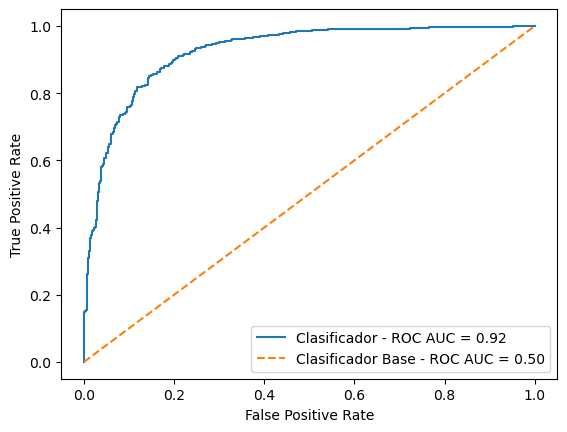

In [298]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

# Generamos un conjunto de datos de prueba con 2 clases
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# Creamos un Clasificador y calculamos las probabilidades de cada elemento
clf = LogisticRegression()
clf.fit(X, y)
X_probs = clf.predict_proba(X)

# Clasificador base: Clasificador con probabilidad de todos los elementos a cero
X_base_prob = [0 for i in range(len(y))]


# Obtenemos Tasa de Verdaderos Positivos (TPR), Tasa de Falsos Positivos (FPR) y el umbral
base_fpr, base_tpr, base_thresholds = roc_curve(y, X_base_prob)
clf_fpr, clf_tpr, clf_thresholds = roc_curve(y, X_probs[:, 1])

# Calculamos el Área bajo la curva
base_auc = roc_auc_score(y, X_base_prob)
clf_auc = roc_auc_score(y, X_probs[:, 1])

# Pintamos la curva ROC
plt.plot(clf_fpr, clf_tpr, label='Clasificador - ROC AUC = {:0.2f}'.format(clf_auc))
plt.plot(base_fpr, base_tpr, linestyle='--', label='Clasificador Base - ROC AUC = {:0.2f}'.format(base_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

<hr>

## - Heatmap - Matriz de Confusión

* Para representar de una forma visual más agradable y legible la matriz de confusión, podemos usar el siguiente código que tiene la función "plot_confusion_matrix()"

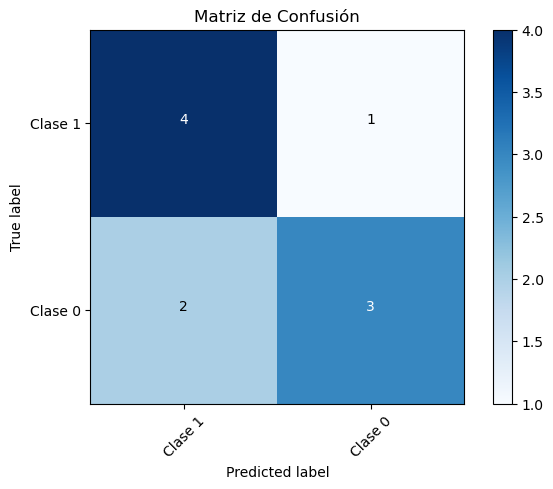

In [300]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Grafica la matriz de confusión
plt.figure()
matriz_confusion = _____(y_true=y_real, y_pred=y_predict, labels=[1, 0])
plot_confusion_matrix(_____, classes=['Clase 1', 'Clase 0'], title='Matriz de Confusión')
plt.show()


## Confusion Matrix

Confusion matrix is used only on classification tasks. It describes the following matrix

|            | predicted true | predicted false |
|------------|----------------|-----------------|
|actual true | True Positive  | False Negative  |
|actual false| False Positive | True Negative   |

---------------------------------------------------

### Accuracy

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

### Precision (Positive Predicted Value) 

$$\text{Precision} = \frac{TP}{TP + FP}$$

Intuitively, what precision states is out of the number of times your model predicts true, how many times is it correct? This metric penalizes heavily for False Positives. This metric should be considered when its OK to have some false negatives but not false positives. Imagine if your model is predicting the conclusion of a jurisdiction. Its OK to leave a criminal free, rather than punishing an innocent one. 

### Recall (Sensitivity) 

$$\text{Recall} = \frac{TP}{TP + FN}$$

Intuitively, what recall states is out of the times the output is true, how many times are you correct? This metric penalizes heavily for False Negatives. This metric should be considered when its OK to have some false positives but not false negatives.


### F1 Score

F1 score is the harmonic mean of precision and recall. 


$$\text{F}_1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$

In [303]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X, y = make_classification()

# Divide en entrenamiento y prueba
_____, _____, y_train, y_test = ______(X, y, test_size=0.2, stratify=y)


# Entrena un clasificador SVM y calcula la matriz de confusión en el conjunto de prueba
clf = SVC().fit(X_train, y_train)
confusion_matrix(y_test, clf.predict(X_test))

array([[10,  0],
       [ 3,  7]])

|            | predicted true | predicted false |
|------------|----------------|-----------------|
|actual true |        10      |        0        |
|actual false|         1      |        9        |

# Logistic classification with cross-entropy (1/2)

This tutorial will describe the [logistic function](#Logistic-function) used to model binary classification problems. We will provide derivations of the gradients used for optimizing any parameters with regards to the [cross-entropy](#Cross-entropy-loss-function-for-the-logistic-function).

To output discrete classes with neural networks, we can model a probability distribution over the output classes $t$. For the classification of 2 classes $t=1$ or $t=0$ we can use the [logistic function](http://en.wikipedia.org/wiki/Logistic_function) used in [logistic regression](http://en.wikipedia.org/wiki/Logistic_regression). For multiclass classification there exists an extension of this logistic function called the [softmax function](http://en.wikipedia.org/wiki/Softmax_function), which is used in [multinomial logistic regression](http://en.wikipedia.org/wiki/Multinomial_logistic_regression). The [following section]({% post_url /blog/cross_entropy/2015-06-11-cross-entropy-softmax %}) will explain the softmax function and how to derive it. What follows here will explain the logistic function and how to optimize it.

This is the first part of a 2-part tutorial on classification models trained by cross-entropy:
- [Part 1: Logistic classification with cross-entropy (this)]({% post_url /blog/cross_entropy/2015-06-10-cross-entropy-logistic %})
- [Part 2: Softmax classification with cross-entropy]({% post_url /blog/cross_entropy/2015-06-11-cross-entropy-softmax %})

In [310]:
# Python imports
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Fancier plots

# Set matplotlib and seaborn plotting style
sns.set_style('darkgrid')
#

## Logistic function

The goal is to predict the target class $t$ from an input $z$. The probability $P(t=1 | z)$ that input $z$ is classified as class $t=1$ is represented by the output $y$ of the logistic function computed as $y = \sigma(z)$. The [logistic function](http://en.wikipedia.org/wiki/Logistic_function) $\sigma$ is defined as:
$$ \sigma(z) = \frac{1}{1+e^{-z}} $$

This logistic function, implemented below as `logistic(z)`, maps the input $z$ to an output between $0$ and $1$ as is illustrated in the figure below.

We can write the probabilities that the class is $t=1$ or $t=0$ given input $z$ as:

$$\begin{split}
P(t=1| z) & = \sigma(z) = \frac{1}{1+e^{-z}} \\
P(t=0| z) & = 1 - \sigma(z) = \frac{e^{-z}}{1+e^{-z}} 
\end{split}$$

Note that input $z$ to the logistic function corresponds to the log [odds ratio](https://en.wikipedia.org/wiki/Odds_ratio) of $P(t=1|z)$ over $P(t=0|z)$.

$$\begin{split}
\log \frac{P(t=1|z)}{P(t=0|z)} & = \log \frac{\frac{1}{1+e^{-z}}}{\frac{e^{-z}}{1+e^{-z}}} = \log \frac{1}{e^{-z}} \\
& = \log(1) - \log(e^{-z}) = z
\end{split}$$

This means that the log-odds $\log(P(t=1|z)/P(t=0|z))$ changes linearly with $z$. If $z = x \cdot w$, as in a typical neural network linear layer, then as a result, the log-odds will change linearly with the parameters $w$ and input samples $x$.

In [313]:
# Define la función logística (sigmoide)
def logistic(z):
    """Función logística."""
    return ____ / (____ + np.exp(-z))

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/3k/55xgmsy119v851jfwg0xzvsc0000gn/T/ipykernel_43496/4060422175.py:6: SyntaxWarning: invalid escape sequence '\s'
  ax.set_ylabel('$\sigma(z)$', fontsize=12)


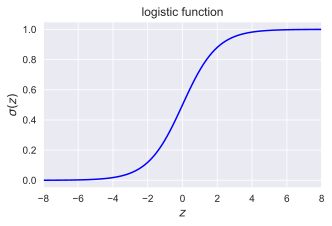

In [315]:
# Plot the logistic function
z = np.linspace(-8, 8, 100)
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(z, logistic(z), 'b-')
ax.set_xlabel('$z$', fontsize=12)
ax.set_ylabel('$\sigma(z)$', fontsize=12)
ax.set_title('logistic function')
ax.set_xlim(-8, 8)
plt.show()
#

### Derivative of the logistic function

Since neural networks typically use [gradient](http://en.wikipedia.org/wiki/Gradient) based opimization techniques such as [gradient descent](http://en.wikipedia.org/wiki/Gradient_descent) it is important to define the [derivative](http://en.wikipedia.org/wiki/Derivative) of the output $y$ of the logistic function with respect to its input $z$. ${\partial y}/{\partial z}$ can be calculated as:

$$
\frac{\partial y}{\partial z} = \frac{\partial \sigma(z)}{\partial z} 
= \frac{\partial \frac{1}{1+e^{-z}}}{\partial z} 
= \frac{-1}{(1+e^{-z})^2} \cdot e^{-z} \cdot -1 
= \frac{1}{1+e^{-z}} \frac{e^{-z}}{1+e^{-z}}
$$

And since $1 - \sigma(z)) = 1 - {1}/(1+e^{-z}) = {e^{-z}}/(1+e^{-z})$ this can be rewritten as:

$$
\frac{\partial y}{\partial z} 
= \frac{1}{1+e^{-z}} \frac{e^{-z}}{1+e^{-z}} 
= \sigma(z) \cdot (1- \sigma(z)) =  y (1-y)
$$

This derivative is implemented as `logistic_derivative(z)` and is plotted below.

In [318]:
# Define la derivada de la función logística
def logistic_derivative(z):
    """Derivada de la función logística."""
    return logistic(z) * (1 - logistic(z))

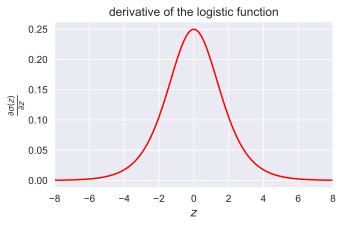

In [320]:
# Plot the derivative of the logistic function
z = np.linspace(-8, 8, 100)
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(z, logistic_derivative(z), 'r-')
ax.set_xlabel('$z$', fontsize=12)
ax.set_ylabel('$\\frac{\\partial \\sigma(z)}{\\partial z}$', fontsize=12)
ax.set_title('derivative of the logistic function')
ax.set_xlim(-8, 8)
plt.show()
#

### Cross-entropy loss function for the logistic function

The output of the model $y = \sigma(z)$ can be interpreted as a probability $y$ that input $z$ belongs to one class $(t=1)$, or probability $1-y$ that $z$ belongs to the other class $(t=0)$ in a two class classification problem. We note this down as: $P(t=1| z) = \sigma(z) = y$.

The neural network model will be optimized by maximizing the [likelihood](http://en.wikipedia.org/wiki/Likelihood_function) that a given set of parameters $\theta$ of the model can result in a prediction of the correct class of each input sample. The parameters $\theta$ transform each input sample $i$ into an input to the logistic function $z_{i}$. The likelihood maximization can be written as:

$$
\underset{\theta}{\text{argmax}}\; \mathcal{L}(\theta|t,z) = \underset{\theta}{\text{argmax}} \prod_{i=1}^{n} \mathcal{L}(\theta|t_i,z_i)
$$

The likelihood $\mathcal{L}(\theta|t,z)$ can be rewritten as the [joint probability](http://en.wikipedia.org/wiki/Joint_probability_distribution) of generating $t$ and $z$ given the parameters $\theta$: $P(t,z|\theta)$. Since $P(A,B) = P(A|B)P(B)$ this can be written as:

$$
P(t,z|\theta) = P(t|z,\theta)P(z|\theta)
$$

Since we are not interested in the probability of $z$ we can reduce this to: $\mathcal{L}(\theta|t,z) = P(t|z,\theta) = \prod_{i=1}^{n} P(t_i|z_i,\theta)$. 
Since $t_i$ is a [Bernoulli variable](http://en.wikipedia.org/wiki/Bernoulli_distribution), and the probability $P(t| z) = y$ is fixed for a given $\theta$ we can rewrite this as: 

$$
\begin{split}
P(t|z) & = \prod_{i=1}^{n} P(t_i=1|z_i)^{t_i} \cdot (1 - P(t_i=1|z_i))^{1-t_i} \\
& = \prod_{i=1}^{n} y_i^{t_i} \cdot (1 - y_i)^{1-t_i} \end{split}
$$

Since the logarithmic function is a monotone increasing function we can optimize the log-likelihood function $\underset{\theta}{\text{argmax}}\; \log \mathcal{L}(\theta|t,z)$. This maximum will be the same as the maximum from the regular likelihood function. The benefit of using the log-likelihood is that it can prevent numerical [underflow](https://en.wikipedia.org/wiki/Arithmetic_underflow) when the probabilities are low. The log-likelihood function can be written as:

$$
\begin{split} \log \mathcal{L}(\theta|t,z) & = \log \prod_{i=1}^{n} y_i^{t_i} \cdot (1 - y_i)^{1-t_i} \\
& = \sum_{i=1}^{n} t_i \log(y_i) + (1-t_i) \log(1 - y_i)
\end{split}
$$

Minimizing the negative of this function (minimizing the negative log likelihood) corresponds to maximizing the likelihood. This error function $\xi(t,y)$ is typically known as the [cross-entropy error function](http://en.wikipedia.org/wiki/Cross_entropy) (also known as log-loss):

$$
\begin{split}
\xi(t,y) & = - \log \mathcal{L}(\theta|t,z) \\
& = - \sum_{i=1}^{n} \left[ t_i \log(y_i) + (1-t_i)\log(1-y_i) \right] \\
& = - \sum_{i=1}^{n} \left[ t_i \log(\sigma(z)) + (1-t_i)\log(1-\sigma(z)) \right]
\end{split}
$$

This function looks complicated but besides the previous derivation there are a couple of intuitions why this function is used as a [loss function](https://en.wikipedia.org/wiki/Loss_function) for logistic regression. First of all it can be rewritten as:

$$
\xi(t_i,y_i) = 
\begin{cases}
    -\log(y_i) & \text{if } t_i = 1 \\
    -\log(1-y_i) & \text{if } t_i = 0
\end{cases}
$$
  
Which in the case of $t_i=1$ is $0$ if $y_i=1$ $(-\log(1)=0)$ and goes to infinity as $y_i \rightarrow 0$ $(\underset{y \rightarrow 0}{\text{lim}}{(-\log(y))} = +\infty)$. The reverse effect is happening if $t_i=0$.  
So what we end up with is a loss function that is $0$ if the probability to predict the correct class is $1$ and goes to infinity as the probability to predict the correct class goes to $0$.

Notice that the loss function $\xi(t,y)$ is equal to the negative [log probability](http://en.wikipedia.org/wiki/Log_probability) that $z$ is classified as its correct class:  
$$
\begin{split}
-\log(P(t=1| z)) &= -\log(y) \\  
-\log(P(t=0| z)) &= -\log(1-y)
\end{split}
$$

By minimizing the negative log probability, we will maximize the log probability. And since $t$ can only be $0$ or $1$, we can write $\xi(t,y)$ as:

$$
\xi(t,y) = -t \log(y) - (1-t) \log(1-y)
$$

Which will give $\xi(t,y) = - \sum_{i=1}^{n} \left[ t_i \log(y_i) + (1-t_i)\log(1-y_i) \right]$ if we sum over all $n$ samples.


Another reason to use the cross-entropy function is that in simple logistic regression this results in a [convex](http://en.wikipedia.org/wiki/Convex_function) loss function, of which the global minimum will be easy to find. Note that this is not necessarily the case anymore in multilayer neural networks.

#### Derivative of the cross-entropy loss function for the logistic function

The derivative ${\partial \xi}/{\partial y}$ of the loss function with respect to its input can be calculated as:

$$
\begin{split}
\frac{\partial \xi}{\partial y} 
&= \frac{\partial (-t \log(y) - (1-t) \log(1-y))}{\partial y} 
= \frac{\partial (-t \log(y))}{\partial y} +  \frac{\partial (- (1-t)  \log(1-y))}{\partial y} \\
& = -\frac{t}{y} + \frac{1-t}{1-y} = \frac{y-t}{y(1-y)}
\end{split}
$$

This derivative will give a nice formula if it is used to calculate the derivative of the loss function with respect to the inputs of the classifier ${\partial \xi}/{\partial z}$ since the derivative of the logistic function is ${\partial y}/{\partial z} =  y (1-y)$:

$$
\frac{\partial \xi}{\partial z} = \frac{\partial y}{\partial z} \frac{\partial \xi}{\partial y} = y (1-y) \frac{y-t}{y(1-y)} = y-t
$$

This was the first part of a 2-part tutorial on classification models trained by cross-entropy:
- [Part 1: Logistic classification with cross-entropy (this)]({% post_url /blog/cross_entropy/2015-06-10-cross-entropy-logistic %})
- [Part 2: Softmax classification with cross-entropy]({% post_url /blog/cross_entropy/2015-06-11-cross-entropy-softmax %})

To see the logistic function in action on a minimal neural network, please read [part 2]({% post_url /blog/neural_net_implementation/2015-06-13-neural-network-implementation-part02 %}) of [this series]({% post_url /blog/neural_net_implementation/2015-06-12-neural-network-implementation-part01 %}) on how to implement a neural network in NumPy.

In [331]:
pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [333]:
# Python package versions used
%load_ext watermark
%watermark --python
%watermark --iversions
#

Python implementation: CPython
Python version       : 3.12.2
IPython version      : 8.27.0

sklearn   : 1.6.1
seaborn   : 0.13.2
numpy     : 1.26.4
tqdm      : 4.67.1
matplotlib: 3.9.2
pandas    : 2.2.3
spacy     : 3.8.4
json      : 2.0.9



# Softmax classification with cross-entropy 

This tutorial will describe the [softmax function](#Softmax-function) used to model multiclass classification problems. We will provide derivations of the gradients used for optimizing any parameters with regards to the [cross-entropy](#Cross-entropy-loss-function-for-the-softmax-function).

The [previous section]({% post_url /blog/cross_entropy/2015-06-10-cross-entropy-logistic %}) described how to represent classification of 2 classes with the help of the [logistic function](http://en.wikipedia.org/wiki/Logistic_function).
For multiclass classification there exists an extension of this logistic function, called the [softmax function](http://en.wikipedia.org/wiki/Softmax_function), which is used in [multinomial logistic regression](http://en.wikipedia.org/wiki/Multinomial_logistic_regression). What follows will explain the softmax function and how to derive it.

This is the second part of a 2-part tutorial on classification models trained by cross-entropy:
- [Part 1: Logistic classification with cross-entropy]({% post_url /blog/cross_entropy/2015-06-10-cross-entropy-logistic %})
- [Part 2: Softmax classification with cross-entropy (this)]({% post_url /blog/cross_entropy/2015-06-11-cross-entropy-softmax %})

In [339]:
# Python imports
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
from matplotlib.colors import colorConverter, ListedColormap
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
from matplotlib import cm # Colormaps
import seaborn as sns  # Fancier plots

# Set matplotlib and seaborn plotting style
sns.set_style('darkgrid')
#

## Softmax function

The [logistic output function](http://en.wikipedia.org/wiki/Logistic_function) described in the previous section can only be used for the classification between two target classes $t=1$ and $t=0$. This logistic function can be generalized to output a multiclass categorical probability distribution by the [softmax function](http://en.wikipedia.org/wiki/Softmax_function). This softmax function $\varsigma$ takes as input a $C$-dimensional vector $\mathbf{z}$ and outputs a $C$-dimensional vector $\mathbf{y}$ of real values between $0$ and $1$. This function is a normalized exponential and is defined as:

$$
y_c = \varsigma(\mathbf{z})_c = \frac{e^{z_c}}{\sum_{d=1}^C e^{z_d}} \quad \text{for} \; c = 1 \cdots C
$$

The denominator $\sum_{d=1}^C e^{z_d}$ acts as a regularizer to make sure that $\sum_{c=1}^C y_c = 1$. 
As the output layer of a neural network, the softmax function can be represented graphically as a layer with $C$ neurons.

We can write the probabilities that the class is $t=c$ for $c = 1 \ldots C$ given input $\mathbf{z}$ as:

$$ 
\begin{bmatrix} 
P(t=1 | \mathbf{z}) \\
\vdots \\
P(t=C | \mathbf{z}) \\
\end{bmatrix}
= \begin{bmatrix} 
\varsigma(\mathbf{z})_1 \\
\vdots \\
\varsigma(\mathbf{z})_C \\
\end{bmatrix}
= \frac{1}{\sum_{d=1}^C e^{z_d}}
\begin{bmatrix} 
e^{z_1} \\
\vdots \\
e^{z_C} \\
\end{bmatrix}
$$

Where $P(t=c | \mathbf{z})$ is thus the probability that that the class is $c$ given the input $\mathbf{z}$.

These probabilities of the output $P(t=1|\mathbf{z})$ for an example system with 2 classes ($t=1$, $t=2$) and input $\mathbf{z} = [z_1, z_2]$ are shown in the figure below. The other probability $P(t=2|\mathbf{z})$ will be complementary.

In [342]:
# Define la función softmax, que convierte un vector de valores en probabilidades
def softmax(z):
    """Softmax function"""
    return np.exp(___) / np.sum(np.____(____))

<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
/var/folders/3k/55xgmsy119v851jfwg0xzvsc0000gn/T/ipykernel_43496/3321793990.py:23: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title ('$P(t=1|\mathbf{z})$')
/var/folders/3k/55xgmsy119v851jfwg0xzvsc0000gn/T/ipykernel_43496/3321793990.py:24: SyntaxWarning: invalid escape sequence '\m'
  cbar.ax.set_ylabel('$P(t=1|\mathbf{z})$', fontsize=12)


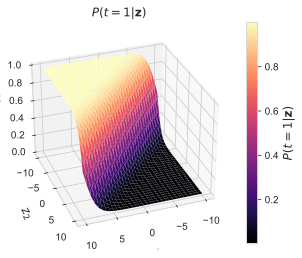

In [344]:
# Plot the softmax output for 2 dimensions for both classes
# Plot the output in function of the weights
# Define a vector of weights for which we want to plot the output
nb_of_zs = 33
zs = np.linspace(-10, 10, num=nb_of_zs) # input 
zs_1, zs_2 = np.meshgrid(zs, zs) # generate grid
y = np.zeros((nb_of_zs, nb_of_zs, 2)) # initialize output
# Fill the output matrix for each combination of input z's
for i in range(nb_of_zs):
    for j in range(nb_of_zs):
        y[i,j,:] = softmax(np.asarray([zs_1[i,j], zs_2[i,j]]))
# Plot the loss function surfaces for both classes
with sns.axes_style("whitegrid"):
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    # Plot the loss function surface for t=1
    surf = ax.plot_surface(zs_1, zs_2, y[:,:,0], linewidth=0, cmap=cm.magma)
    ax.view_init(elev=30, azim=70)
    cbar = fig.colorbar(surf)
    ax.set_xlabel('$z_1$', fontsize=2)
    ax.set_ylabel('$z_2$', fontsize=12)
    ax.set_zlabel('$y_1$', fontsize=12)
    ax.set_title ('$P(t=1|\mathbf{z})$')
    cbar.ax.set_ylabel('$P(t=1|\mathbf{z})$', fontsize=12)
plt.show()
#

### Derivative of the softmax function

To use the softmax function in neural networks, we need to compute its derivative. If we define $\Sigma_C = \sum_{d=1}^C e^{z_d} \, \text{for} \; c = 1 \cdots C$ so that $y_c = e^{z_c} / \Sigma_C$, then this derivative ${\partial y_i}/{\partial z_j}$ of the output $\mathbf{y}$ of the softmax function with respect to its input $\mathbf{z}$ can be calculated as:

$$
\begin{split}
\text{if} \; i = j :& \frac{\partial y_i}{\partial z_i} = \frac{\partial \frac{e^{z_i}}{\Sigma_C}}{\partial z_i} = \frac{e^{z_i}\Sigma_C - e^{z_i}e^{z_i}}{\Sigma_C^2} = \frac{e^{z_i}}{\Sigma_C}\frac{\Sigma_C - e^{z_i}}{\Sigma_C} = \frac{e^{z_i}}{\Sigma_C}(1-\frac{e^{z_i}}{\Sigma_C}) =  y_i (1 - y_i)\\
\text{if} \; i \neq j :& \frac{\partial y_i}{\partial z_j} = \frac{\partial \frac{e^{z_i}}{\Sigma_C}}{\partial z_j} = \frac{0 - e^{z_i}e^{z_j}}{\Sigma_C^2} = -\frac{e^{z_i}}{\Sigma_C} \frac{e^{z_j}}{\Sigma_C} = -y_i y_j
\end{split}$$

Note that if $i = j$ this derivative is similar to the derivative of the logistic function.


### Cross-entropy loss function for the softmax function

To derive the loss function for the softmax function we start out from the [likelihood function](http://en.wikipedia.org/wiki/Likelihood_function) that a given set of parameters $\theta$ of the model can result in prediction of the correct class of each input sample, as in the derivation for the logistic loss function. The maximization of this likelihood can be written as:

$$
\underset{\theta}{\text{argmax}}\; \mathcal{L}(\theta|\mathbf{t},\mathbf{z})
$$

The likelihood $\mathcal{L}(\theta|\mathbf{t},\mathbf{z})$ can be rewritten as the [joint probability](http://en.wikipedia.org/wiki/Joint_probability_distribution) of generating $\mathbf{t}$ and $\mathbf{z}$ given the parameters $\theta$: $P(\mathbf{t},\mathbf{z}|\theta)$. Which can be decomposed as a conditional distribution and a marginal:

$$
P(\mathbf{t},\mathbf{z}|\theta) = P(\mathbf{t}|\mathbf{z},\theta)P(\mathbf{z}|\theta)
$$

Since we are not interested in the probability of $\mathbf{z}$ we can reduce this to: $\mathcal{L}(\theta|\mathbf{t},\mathbf{z}) = P(\mathbf{t}|\mathbf{z},\theta)$. Which can be written as $P(\mathbf{t}|\mathbf{z})$ for fixed $\theta$.
Since each $t_c$ is dependent on the full $\mathbf{z}$, and only 1 class can be activated in the $\mathbf{t}$ we can write

$$
P(\mathbf{t}|\mathbf{z}) = \prod_{i=c}^{C} P(t_c|\mathbf{z})^{t_c} = \prod_{c=1}^{C} \varsigma(\mathbf{z})_c^{t_c} = \prod_{c=1}^{C} y_c^{t_c}
$$


As was noted during the derivation of the loss function of the logistic function, maximizing this likelihood can also be done by minimizing the negative log-likelihood:

$$-\log \mathcal{L}(\theta|\mathbf{t},\mathbf{z}) 
= \xi(\mathbf{t},\mathbf{z}) = - \log \prod_{c=1}^{C} y_c^{t_c} 
= - \sum_{c=1}^{C} t_c \cdot \log(y_c)
$$

Which is the cross-entropy error function $\xi$.
Note that for a 2 class system output $t_2 = 1 - t_1$ and this results in the same error function as for logistic regression: $\xi(\mathbf{t},\mathbf{y}) =- t_c \log(y_c) - (1-t_c) \log(1-y_c) $.

The cross-entropy error function over a batch of multiple samples of size $n$ can be calculated as:

$$
\xi(T,Y) = \sum_{i=1}^n \xi(\mathbf{t}_i,\mathbf{y}_i) = -\sum_{i=1}^n \sum_{c=1}^{C} t_{ic} \cdot \log( y_{ic})
$$

Where $t_{ic}$ is 1 if and only if sample $i$ belongs to class $c$, and $y_{ic}$ is the output probability that sample $i$ belongs to class $c$.

#### Derivative of the cross-entropy loss function for the softmax function

The derivative ${\partial \xi}/{\partial z_i}$ of the loss function with respect to the softmax input $z_i$ can be calculated as:

$$
\begin{split}
\frac{\partial \xi}{\partial z_i} & = - \sum_{j=1}^C \frac{\partial t_j \log(y_j)}{\partial z_i}{} 
= - \sum_{j=1}^C t_j \frac{\partial \log(y_j)}{\partial z_i} 
= - \sum_{j=1}^C t_j \frac{1}{y_j} \frac{\partial y_j}{\partial z_i} \\
& = - \frac{t_i}{y_i} \frac{\partial y_i}{\partial z_i} - \sum_{j \neq i}^C \frac{t_j}{y_j} \frac{\partial y_j}{\partial z_i}
= - \frac{t_i}{y_i} y_i (1-y_i) - \sum_{j \neq i}^C \frac{t_j}{y_j} (-y_j y_i) \\
& = - t_i + t_i y_i + \sum_{j \neq i}^C t_j y_i = - t_i + \sum_{j = 1}^C t_j y_i
= -t_i + y_i \sum_{j = 1}^C t_j \\
& = y_i - t_i
\end{split}
$$

Note that we already derived ${\partial y_j}/{\partial z_i}$ for $i=j$ and $i \neq j$ above.

The result that ${\partial \xi}/{\partial z_i} = y_i - t_i$ for all $i \in C$ is the same as the derivative of the cross-entropy for the logistic function which had only one output node.

This is the second part of a 2-part tutorial on classification models trained by cross-entropy:
- [Part 1: Logistic classification with cross-entropy]({% post_url /blog/cross_entropy/2015-06-10-cross-entropy-logistic %})
- [Part 2: Softmax classification with cross-entropy (this)]({% post_url /blog/cross_entropy/2015-06-11-cross-entropy-softmax %})

To see the softmax function in action on a minimal neural network, please read [part 4]({% post_url /blog/neural_net_implementation/2015-06-15-neural-network-implementation-part04 %}) of [this series]({% post_url /blog/neural_net_implementation/2015-06-12-neural-network-implementation-part01 %}) on how to implement a neural network in NumPy.

In [350]:
# Versions used
%load_ext watermark
%watermark --python
%watermark --iversions
#

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.12.2
IPython version      : 8.27.0

sklearn   : 1.6.1
seaborn   : 0.13.2
numpy     : 1.26.4
tqdm      : 4.67.1
matplotlib: 3.9.2
pandas    : 2.2.3
spacy     : 3.8.4
json      : 2.0.9



This post at <a rel="canonical" href="https://peterroelants.github.io/posts/cross-entropy-softmax/">peterroelants.github.io</a> is generated from an IPython notebook file. [Link to the full IPython notebook file](https://github.com/peterroelants/peterroelants.github.io/blob/main/notebooks/cross_entropy/cross-entropy-softmax.ipynb)

## Receiver Operating Characteristic (ROC) Curve

ROC curve is a commonly used tool to evaluate __binary classifier__. It is used to compare different models. ROC curve has __False Positive Rate__ or X-axis and __True Positive Rate__ on Y-axis. 
Where,

$$\text{False Positive Rate} = \frac{FP}{FP + TN}$$
$$\text{True Positive Rate} = \frac{TP}{TP + FN}$$

## Setting optimum threshold

Most of the time we are inclined towards setting the threshold of $0.5$ for classification tasks, but can we do better? 

Using various thresholds we can output the accuracy and select the threshold with highest accuracy. 

# **Machine Learning in Python: Making Receiver Operating Characteristic (ROC) curve**

Chanin Nantasenamat

<i>Data Professor YouTube channel, http://youtube.com/dataprofessor </i>

In this Jupyter notebook, we will be making a Receiver Operating Characteristic (ROC) curve using a synthetic data set as an example.

## **What is ROC curve?**

The **ROC curve** summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the **False Positive Rate (FPR)** on the *X-axis* and the **True Positive Rate (TPR)** on the *Y-axis*.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

## **Generate synthetic dataset**

In [376]:
from sklearn.datasets import make_classification

In [378]:
# Genera un conjunto de datos sintético para clasificación binaria
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)


## **Add noisy features to make the problem more difficult** $^1$


In [381]:
import numpy as np

In [383]:
# Añade características adicionales aleatorias al conjunto de datos
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

## **Data splitting**

In [386]:
from sklearn.model_selection import train_test_split

In [388]:
# Divide el conjunto de datos en entrenamiento y prueba
____, _____, _____, _____ = ______(X, Y, test_size=.2, random_state=0)


## **Build classification model**

In [391]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

### Random Forest

In [12]:
# Entrena modelos de clasificación: Random Forest
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.____(X_train, Y_train)

NameError: name 'RandomForestClassifier' is not defined

### Naive Bayes

In [396]:
# Entrena  modelos de clasificación:  Naive Bayes 

nb = GaussianNB()
nb.____(X_train, Y_train)


GaussianNB()

In [397]:
# Entrena  modelo de clasificación: K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

## **Prediction probabilities** $^2$

In [399]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [401]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]

## **Computing AUROC and ROC curve values**

In [403]:
from sklearn.metrics import roc_curve, roc_auc_score

### **Calculate AUROC**
**ROC** is the receiver operating characteristic
**AUROC** is the area under the ROC curve

In [405]:
# Calcula el área bajo la curva ROC (AUROC) para cada modelo
r_auc = _____(Y_test, _____)
rf_auc = _____(Y_test, _____)
nb_auc = _____(Y_test, _____)
knn_auc = _____(Y_test, _____)

### **Print AUROC scores**

In [407]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('K Nearest Neighbors: AUROC = %.3f' % (knn_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.885
Naive Bayes: AUROC = 0.993
K Nearest Neighbors: AUROC = 0.580


### **Calculate ROC curve**

In [409]:
# Calcula las curvas ROC para cada modelo
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)

In [410]:
nb_fpr, nb_tpr

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00483092, 0.00483092, 0.00483092, 0.00483092,
        0.0531401 , 0.0531401 , 0.06280193, 0.06280193, 0.08695652,
        0.08695652, 0.12560386, 0.12560386, 0.2705314 , 0.2705314 ,
        1.        ]),
 array([0.        , 0.14507772, 0.17098446, 0.1761658 , 0.20725389,
        0.21761658, 0.21761658, 0.22279793, 0.23316062, 0.97409326,
        0.97409326, 0.97927461, 0.97927461, 0.98445596, 0.98445596,
        0.98963731, 0.98963731, 0.99481865, 0.99481865, 1.        ,
        1.        ]))

In [414]:
knn_fpr, knn_tpr

(array([0.        , 0.04347826, 0.16908213, 0.50241546, 0.79710145,
        0.97101449, 1.        ]),
 array([0.        , 0.06217617, 0.2642487 , 0.61658031, 0.88082902,
        0.97927461, 1.        ]))

## **Plot the ROC curve**

In [441]:
import matplotlib.pyplot as plt

In [443]:
pip install latex

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7633 sha256=2b3d4280b3acfe562b51a71eb8284a16f86d61120bf028bfb4cca9fa45ec0fd6
  Stored in directory: /Users/abdessamadammihafaou/Library/Caches/pip/wheels/4c/6e/66/29e29480ca5a0c0b2c628bec4e37c21f3eafcd53b0282b48e2
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7272 sha256=55eb1dd113a39d665dd39155bf0df9feb95242425cd45eeef989050a51591855
  Stored in directory: /Users/abdessamadammihafaou/Library/Caches/pip/wheels/0e/90/87/0e55006f5c69af278687927041e334cfb928ab0a7ad9b0c1a3
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2802 sha256=c7913b2cfdbafc07370a1b301e4a30f7394f2fb33a645a05f70168f35eff7623
  Stored in directory: /Users/abdessamadammihafaou/Library/Caches/pip/wheels/6d/11/16/61438ffcedd8e5438380547db00

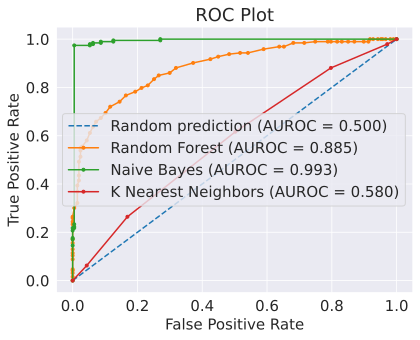

In [449]:
import matplotlib.pyplot as plt

# Restablecer la configuración de fuentes predeterminada
plt.rcParams.update({
    'font.family': 'sans-serif',  # Usar fuentes sans-serif
    'font.sans-serif': ['DejaVu Sans', 'Arial', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
})

# Desactivar el uso de LaTeX en matplotlib
plt.rcParams.update({'text.usetex': False})

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbors (AUROC = %0.3f)' % knn_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

## **Save ROC plot**

In [453]:
from IPython.display import Image, display

### Save plot to files

In [456]:
plt.savefig('roc.pdf')

In [458]:
plt.savefig('roc.png')

In [462]:
! ls -l roc.png

-rw-r--r--  1 abdessamadammihafaou  staff  2396 23 feb 11:26 roc.png


### View the generated PNG and PDF files

## **Reference**
1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
2. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


---